# FPGheArt - Week 4 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Part 2

## Data loading and 3d visualization

In [2]:
data = np.loadtxt("DATA/data_t-SNE_310101_d5_R100_e1_N800.dat")

data = pd.DataFrame(data)
data.shape

(800, 5)

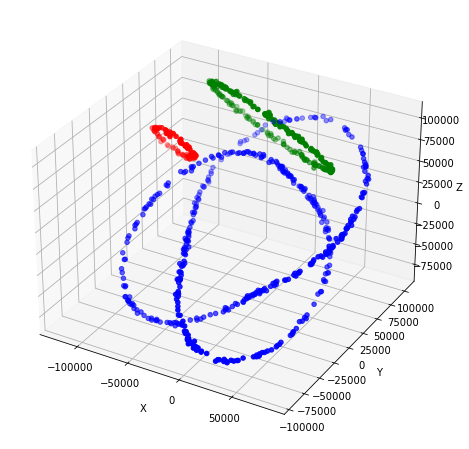

In [3]:
# Fixing random state for reproducibility
np.random.seed(12345)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data.iloc[:80,0], data.iloc[:80,1], data.iloc[:80,2], marker='o', color = 'red')
ax.scatter(data.iloc[80:320,0], data.iloc[80:320,1], data.iloc[80:320,2], marker='o', color = 'green')
ax.scatter(data.iloc[320:,0], data.iloc[320:,1], data.iloc[320:,2], marker='o', color = 'blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## PCA result

[[-100897.48415242   53600.95787939]
 [-130391.64253573   67402.32342782]
 [-108363.60213013   58131.77506101]
 ...
 [  85483.95001856  101489.6861241 ]
 [ -34477.97962161   -9810.33944984]
 [ 111336.45246834   29629.36770431]]


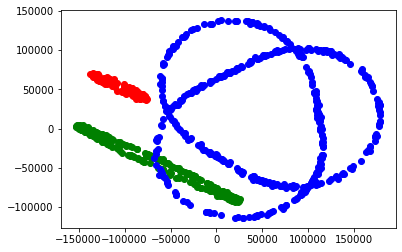

In [4]:
pca = PCA(n_components=2)
data_pca_twodim = pca.fit_transform(data)

print(data_pca_twodim)

plt.scatter(data_pca_twodim[:80,0], data_pca_twodim[:80,1] ,color = 'red')
plt.scatter(data_pca_twodim[80:320,0], data_pca_twodim[80:320,1] ,color = 'green')
plt.scatter(data_pca_twodim[320:,0], data_pca_twodim[320:,1], color = 'blue')
plt.show()

## TSNE

In [5]:
data_embedded_list = []
perplexities = [5,30,50,100]

for i in perplexities:
    data_embedded_list.append(TSNE(n_components=2, perplexity = i, init = 'random').fit_transform(data))
# data_embedded_30 = TSNE(n_components=2, perplexity = 100, init = 'random').fit_transform(data)
# data_embedded_30

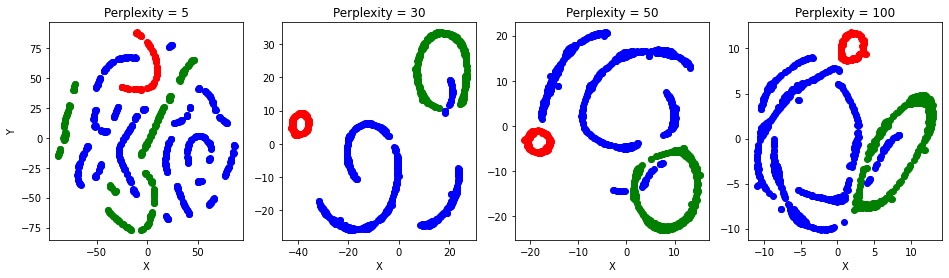

In [6]:
np.random.seed(12345)

fig,ax = plt.subplots(1,4,figsize = (16,4))


for i in range(4):
    
    ax[i].scatter(data_embedded_list[i][:80,0], data_embedded_list[i][:80,1], marker='o', color = 'red')
    ax[i].scatter(data_embedded_list[i][80:320,0], data_embedded_list[i][80:320,1], marker='o', color = 'green')
    ax[i].scatter(data_embedded_list[i][320:,0], data_embedded_list[i][320:,1], marker='o', color = 'blue')
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.show()

## Typical minimium distance between points

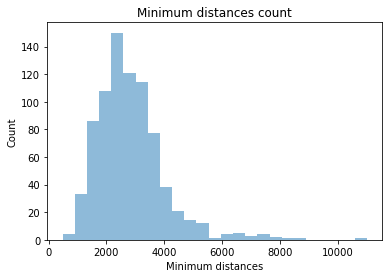

In [7]:
min_dist = []
for i in data.index:
    
    min_dist.append(np.sqrt(((data.drop(i)-data.loc[i])**2).sum(axis = 1).min()))

plt.hist(min_dist, bins = 25, alpha = 0.5)
plt.xlabel("Minimum distances")
plt.ylabel("Count")
plt.title("Minimum distances count")
plt.show()

## DBSCAN

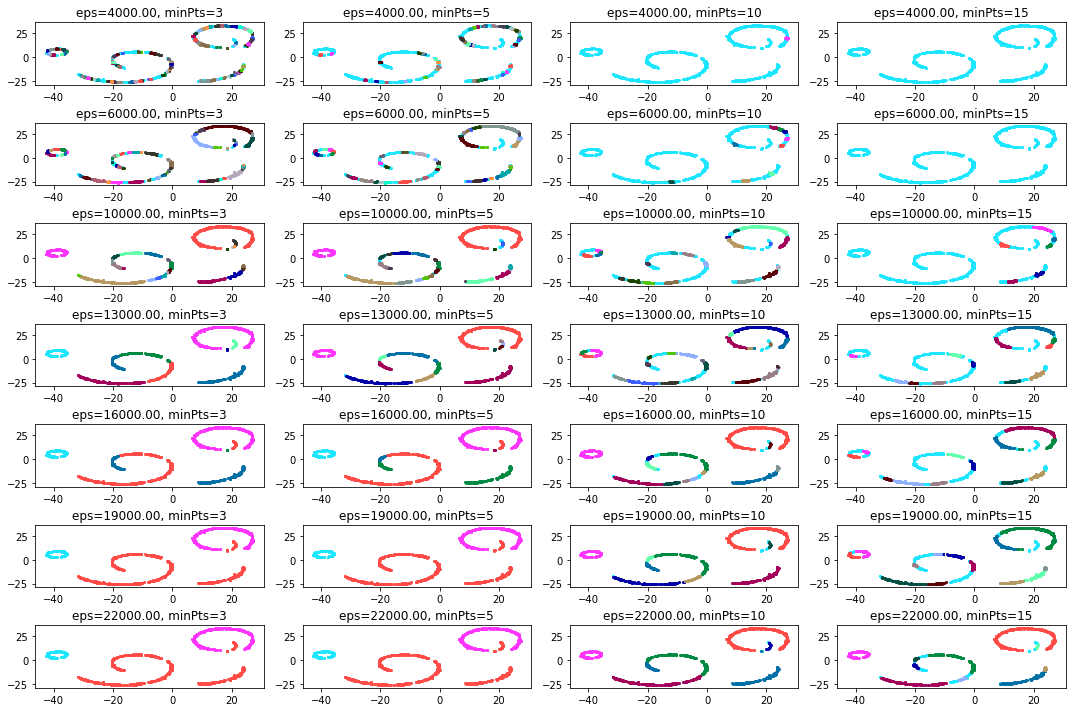

In [8]:
eps_range = [4000, 6000, 10000, 13000, 16000, 19000, 22000]
min_sample_range = [3,5,10,15]
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=4)
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y = model.labels_
        plotting_ax(data_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))

#         nmi=NMI(y, ytrue)
#         ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

Best result is obtained with eps = 19000/22000 and minPts = 3/5!
All clusters seem to be perfectly recognised. The hint given from the minimum distance in 5Dimensions in not of course yet present in the 2D reduction, but we can expect that about 7-8 times the minimum distance may be a nice radius for catching all clusters.

# PART 2

In [10]:
x = np.loadtxt("DATA/x_M5_N400.csv")
y = np.loadtxt("DATA/y_M5_N400.csv")

x

array([[0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 1.]])

In [46]:
x_embedded_list = []
perplexities = [5,30,50,100]

for i in perplexities:
    x_embedded_list.append(TSNE(n_components=2, perplexity = i, init = 'random').fit_transform(x))
    


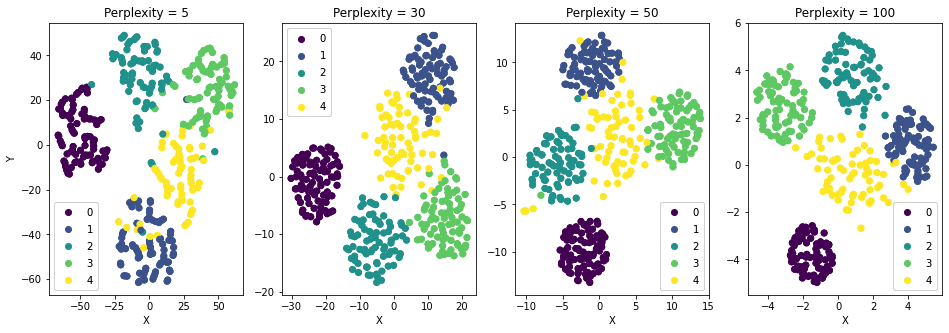

In [47]:
fig,ax = plt.subplots(1,4,figsize = (16,5))

for i in range(4):
    
    ax[i].scatter(x_embedded_list[i][:,0], x_embedded_list[i][:,1], c =  y)
    scatter = ax[i].scatter(x_embedded_list[i][:,0], x_embedded_list[i][:,1], c=y)

    legend1 = ax[i].legend(*scatter.legend_elements(),
                    loc="best")
    ax[i].add_artist(legend1)
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.show()

Even with perplexity = 30 - the best choice - the points with labels 1 and 4 are not completely distinguishable. This may be linked to a similarity of these two type of data in the initial sets.


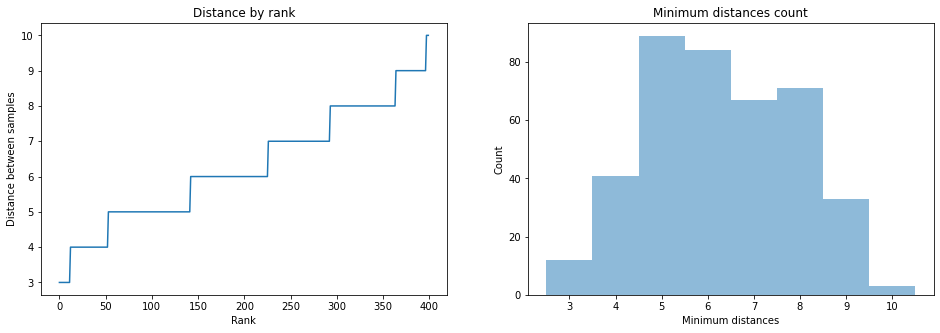

In [70]:
x = pd.DataFrame(x)
x

x_min_dist = []
for i in x.index:
    x_min_dist.append(np.abs(((x.drop(i)-x.loc[i]))).sum(axis = 1).min())

    

fig,ax = plt.subplots(1,2,figsize = (16,5))  
x_min_dist.sort()
ax[0].plot(x_min_dist)
ax[0].set_xlabel("Rank")
ax[0].set_ylabel("Distance between samples")
ax[0].set_title("Distance by rank")
ax[1].hist(x_min_dist, bins = np.arange(3,12)-.5, alpha = 0.5)
ax[1].set_xlabel("Minimum distances")
ax[1].set_ylabel("Count")
ax[1].set_title("Minimum distances count")
plt.show()
# plt.hist(x_min_dist, bins = 7, alpha = 0.5)
# plt.xlabel("Minimum distances")
# plt.ylabel("Count")
# plt.title("Minimum distances count")
# plt.show()

# DBSCAN

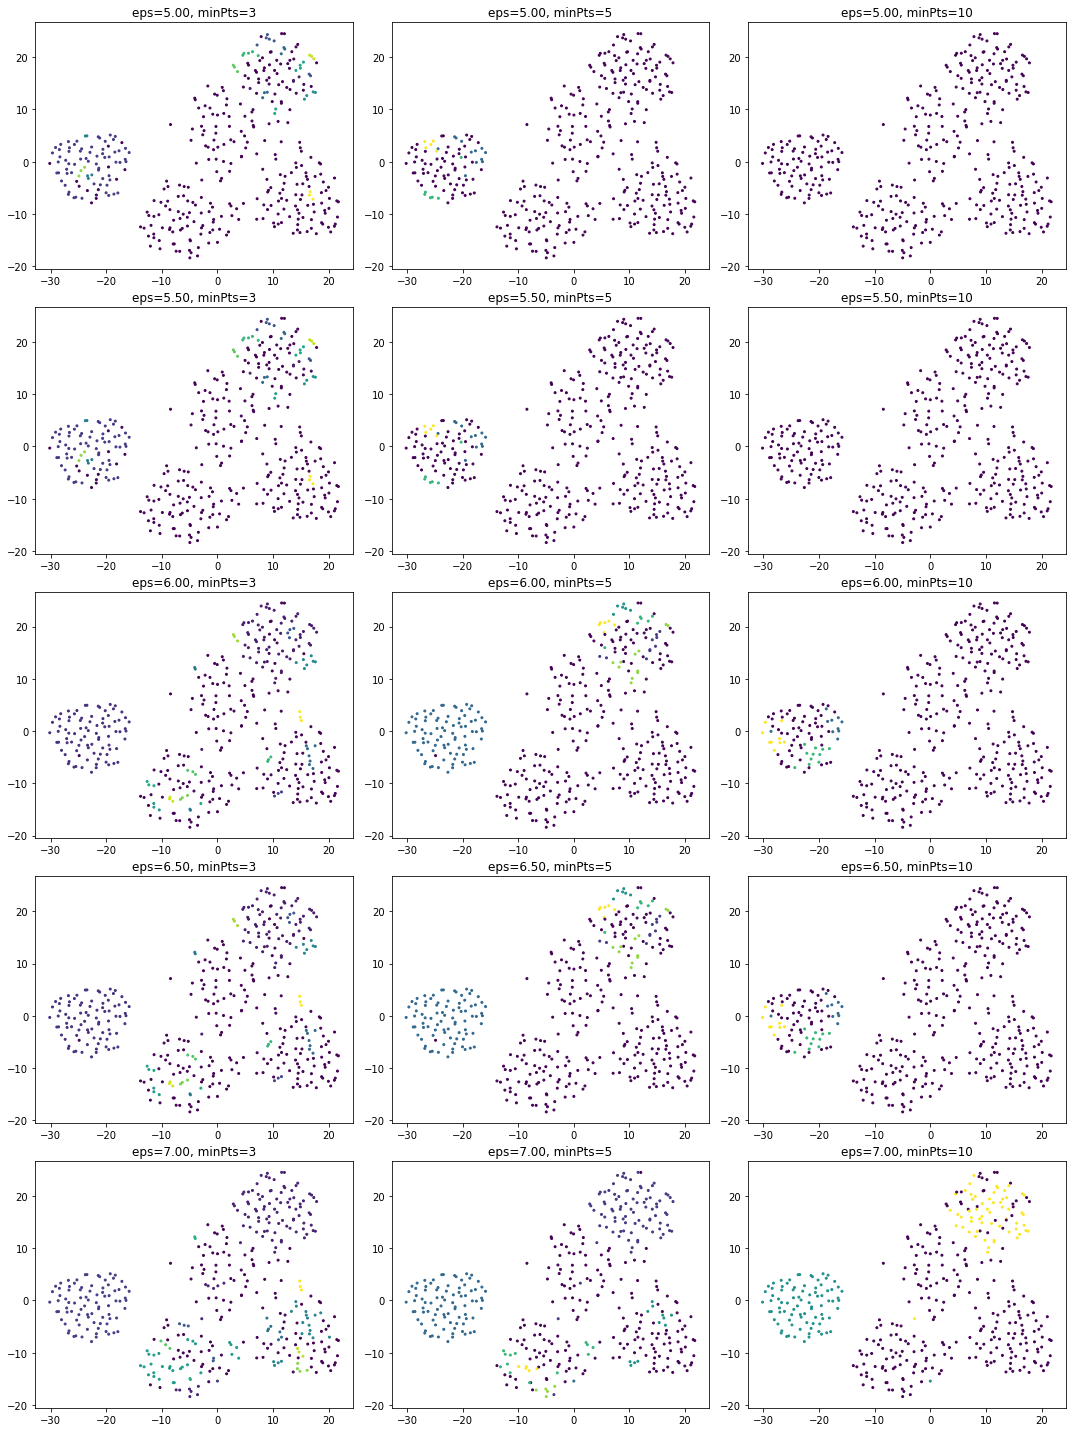

In [88]:
eps_range = [5,5.5,6,6.5,7]
min_sample_range = [3,5,10]
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
#     for i, yu in enumerate(np.unique(y)):
#         pos = (y == yu)
    ax.scatter(X[:,0], X[:,1], c=y, s=4)
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,20))
borgo = []

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric = 'manhattan')
        model.fit(x)
        borgo.append(model.labels_)
        y = model.labels_
        plotting_ax(x_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))

#         nmi=NMI(y, ytrue)
#         ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

As expected, the algorithm does not manage to split correctly the data, and the only cluster that gets recognised (in some cases) correctly is the y = 0 one. 
Moreover, while in the previous case it was possible to increase the eps parameter by an order of magnitute and get the best results possible, in this case of course we can increase the eps parameter only up to 10, which is the maximum reachable distance. 

